# **Import Dependencies**

In [1]:
!pip install Keras-Preprocessing
!pip install sklearn
!pip install bangla-stemmer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 1.5 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [2]:
!pip install --upgrade scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 33.2 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
import re,json,nltk
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import LSTM,Dense,Embedding,SpatialDropout1D
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Conv1D, Flatten
from keras.preprocessing import sequence
from tensorflow.keras.utils import to_categorical
import pandas as pd
from collections import Counter
from sklearn.metrics import  confusion_matrix
import seaborn
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
import plotly as py
import cufflinks as cf
import tensorflow
from tensorflow.keras import Sequential
from plotly.offline import iplot
py.offline.init_notebook_mode(connected=True)
cf.go_offline()
import plotly.express as px
from tensorflow.keras.layers import Bidirectional, GlobalMaxPool1D, Dense, LSTM, Conv1D, Embedding
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Load Dataset**

In [5]:
file_path="/content/drive/MyDrive/Research Work/EMNLP/Code/Test Folder/Copy of blp23_sentiment_test_with_label.xlsx"

In [25]:
df=pd.read_excel("/content/drive/MyDrive/Research Work/EMNLP/Code/Test Folder/Copy of blp23_sentiment_test_with_label.xlsx")

In [26]:
df.head()

,id,text,label
0,7135,মুখস্ত শিক্ষা দিয়ে কি করবে এই জাতি ? বাংলাদেশ...,Negative
1,28949,জর্ডানের সাবেক যুবরাজ প্রিন্স হামজার ভিডিও বার...,Negative
2,10210,আমার ছেলের দুর্ভাগ্য না সৌভাগ্য জানিনা জ্বর এর...,Neutral
3,9526,Pranoy Sen তখন পাকিস্তান ও আফগানিস্তান ভারতের ...,Neutral
4,2142,আরো কত মিথ্যাচার করবে,Negative


In [27]:
df.drop(["id"],axis=1,inplace=True)

In [28]:
df.columns=["Sentences","Sentiment"]

In [29]:
df.head()

,Sentences,Sentiment
0,মুখস্ত শিক্ষা দিয়ে কি করবে এই জাতি ? বাংলাদেশ...,Negative
1,জর্ডানের সাবেক যুবরাজ প্রিন্স হামজার ভিডিও বার...,Negative
2,আমার ছেলের দুর্ভাগ্য না সৌভাগ্য জানিনা জ্বর এর...,Neutral
3,Pranoy Sen তখন পাকিস্তান ও আফগানিস্তান ভারতের ...,Neutral
4,আরো কত মিথ্যাচার করবে,Negative


In [30]:
df.shape

(6707, 2)

# **Check Null Value**

In [31]:
df.isnull().sum()

Sentences    0
Sentiment    0
dtype: int64

# **Delete NAN Row**

In [32]:
df=df.dropna(subset=['Sentences','Sentiment'])

In [33]:
df.isnull().sum()

Sentences    0
Sentiment    0
dtype: int64

In [34]:
df["Sentiment"].unique()

array(['Negative', 'Neutral', 'Positive'], dtype=object)

In [35]:
print(
    "Total Comment:",len(df),
    "\nTotal men :",len(df[df.Sentiment =='Positive']),
    "\nTotal Cloth :",len(df[df.Sentiment=='Negative']),
    "\nTotal Women :",len(df[df.Sentiment =='Neutral'])
    )

Total Comment: 6707 
Total men : 2092 
Total Cloth : 3338 
Total Women : 1277


In [36]:
df['Sentiment'].value_counts()

Negative    3338
Positive    2092
Neutral     1277
Name: Sentiment, dtype: int64

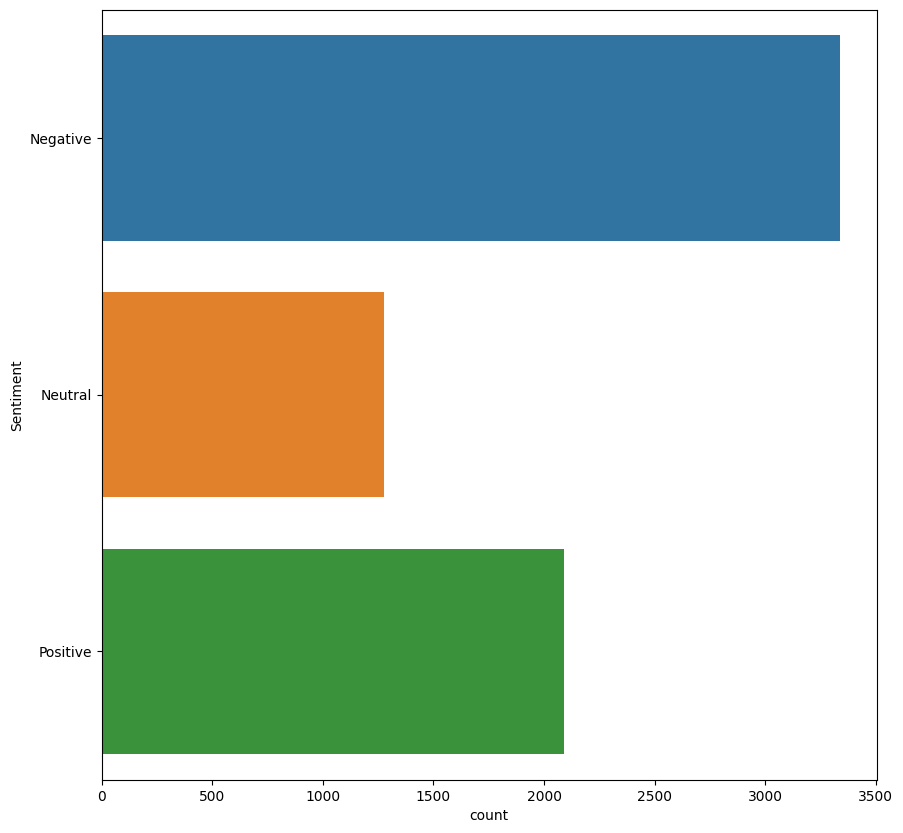

In [37]:
plt.subplots(figsize = (10,10))
sns.countplot(y='Sentiment', data=df)
plt.show()

In [38]:
df['Sentiment'].value_counts()

Negative    3338
Positive    2092
Neutral     1277
Name: Sentiment, dtype: int64

# **Data Preperation and Cleaning**

In [39]:
# from bangla_stemmer.stemmer import stemmer
# import pandas as pd
# def augment_neutral_data(text):
#     stmr = stemmer.BanglaStemmer()
#     augmented_text = stmr.stem(text)
#     return augmented_text

# neutral_data = df[df['Sentiment'] == 'Neutral']['Sentences']
# augmented_neutral_data = neutral_data.apply(augment_neutral_data)
# augmented_df = pd.DataFrame({'Sentences': augmented_neutral_data, 'Sentiment': 'Neutral'})
# # Concatenate the augmented data with the original DataFrame
# df = pd.concat([df, augmented_df], ignore_index=True)

# print(augmented_df)

# **Sampling**

```
I have down the sample of
Electronics        101484
Mobiles             47790
Everything Else     47607
Computers           40599
Home & Living       18660
Fashion             11952
Health & Beauty      6197
```



In [40]:
df['no_char'] = df['Sentences'].apply(lambda Sentence: len(Sentence))

In [41]:
df['length'] = df['Sentences'].apply(lambda x:len(x.split()))

In [42]:
df = df.sort_values(by='length', ascending=False)

In [43]:
df.head(100)

,Sentences,Sentiment,no_char,length
3112,"ধর্ম কোন পণ্য নয় , ধর্মীয় কাজ কোন পেশা নয় । ধর...",Neutral,2890,514
1338,দূর্নীতিই প্রথম কারণ । ১৩০ টাকার কর্মচারী নুরু...,Negative,2049,352
5188,English Expert হতে চাইলে friend request দিয়ে ...,Neutral,1958,327
1186,জাতীয় বিশ্ববিদ্যালয় হতে পাশ করা ছাত্রদের মধ্যে...,Negative,1939,312
2396,১৯৭১ সালে যারা পশ্চিম পাকিস্তানের সাথে যুদ্ধ ক...,Neutral,1878,312
...,...,...,...,...
374,"Barakaat lahBarakaat lah ভাই , উনি আমাকে যেখান...",Neutral,371,71
161,তালেবানকে প্রমাণ করতে হবে- ধর্মভিত্তিক রাজনীতি...,Neutral,414,71
2940,Soumitro Dasgupta নিয়াজীর আত্মসমর্পণের একখণ্ড ...,Negative,436,71
523,এখানে যারা আমেরিকা কিংবা ইউরোপের দালালি করতে আ...,Negative,403,71


In [44]:
dataset = df.loc[df.length>3]
dataset = dataset.reset_index(drop = True)
print("After Cleaning:","\nRemoved {} Small conversations".format(len(df)-len(dataset)),
      "\nTotal conversations:",len(dataset))

After Cleaning: 
Removed 297 Small conversations 
Total conversations: 6410


In [45]:
newdf = dataset.loc[dataset['length'] <= 50]
newdf = newdf.reset_index(drop = True)
print("After Cleaning:","\nRemoved {} Big conversations".format(len(dataset)-len(newdf)),
      "\nTotal conversations:",len(newdf))

After Cleaning: 
Removed 210 Big conversations 
Total conversations: 6200


In [46]:
newdf['Sentiment'].value_counts()

Negative    3108
Positive    1981
Neutral     1111
Name: Sentiment, dtype: int64

In [ ]:
# import pandas as pd
# downsampled_data = pd.concat([
#     newdf[newdf['Sentiment'] == 'Negative'].sample(n=10000, replace=False),
#     newdf[newdf['Sentiment'] == 'Positive'].sample(n=10000, replace=False),
#     newdf[newdf['Sentiment'] == 'Neutral']
# ])

# newdf = downsampled_data.sample(frac=1).reset_index(drop=True)

In [47]:
newdf['Sentiment'].value_counts()

Negative    3108
Positive    1981
Neutral     1111
Name: Sentiment, dtype: int64

### **Seperate Row as Category Wise**

In [48]:
positive = newdf['Sentiment'] == "Positive"
Positive = newdf[positive]
negative = newdf['Sentiment']  == "Negative"
Negative = newdf[negative]
neutral = newdf['Sentiment'] == "Neutral"
Neutral = newdf[neutral]

In [49]:
newdf.head()

,Sentences,Sentiment,no_char,length
0,একবার আমার এমন অবস্থা হয়েছিল এক হাজার টাকার ব...,Neutral,272,50
1,ধন্যবাদ পুলিশ রইস উদ্দীন কে আল্লাহ উনাকে নেক হ...,Positive,272,50
2,সহ শিক্ষার যে করুণা দশা তা কাউকে বুঝাতে বা বুঝ...,Neutral,243,50
3,পড়াশুনা না করে টাকা উপার্জন করা দরকার আর সেই ...,Negative,278,50
4,ছবি টা জমা দিছে কে ? নাকি ইন্ডিয়ান এক্সপ্রেস গ...,Negative,247,50


In [50]:
dataset=newdf.copy()

### **Removal of Punctuations**

In [51]:
import string
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

dataset["Sentences"] = dataset["Sentences"].apply(lambda text: remove_punctuation(text))
dataset.head()

,Sentences,Sentiment,no_char,length
0,একবার আমার এমন অবস্থা হয়েছিল এক হাজার টাকার ব...,Neutral,272,50
1,ধন্যবাদ পুলিশ রইস উদ্দীন কে আল্লাহ উনাকে নেক হ...,Positive,272,50
2,সহ শিক্ষার যে করুণা দশা তা কাউকে বুঝাতে বা বুঝ...,Neutral,243,50
3,পড়াশুনা না করে টাকা উপার্জন করা দরকার আর সেই ...,Negative,278,50
4,ছবি টা জমা দিছে কে নাকি ইন্ডিয়ান এক্সপ্রেস গু...,Negative,247,50


In [52]:
dataset.shape

(6200, 4)

In [53]:
import re

# Define a regular expression pattern to match Bengali characters and spaces
bengali_pattern = re.compile("[\u0980-\u09FF ]+")

# Function to remove non-Bengali characters from a string
def remove_non_bengali_chars(text):
    return "".join(filter(bengali_pattern.match, text))

# Apply the function to each element in your dataset
dataset['Bengali_Text'] = dataset['Sentences'].apply(remove_non_bengali_chars)


In [54]:
dataset.head()

,Sentences,Sentiment,no_char,length,Bengali_Text
0,একবার আমার এমন অবস্থা হয়েছিল এক হাজার টাকার ব...,Neutral,272,50,একবার আমার এমন অবস্থা হয়েছিল এক হাজার টাকার ব...
1,ধন্যবাদ পুলিশ রইস উদ্দীন কে আল্লাহ উনাকে নেক হ...,Positive,272,50,ধন্যবাদ পুলিশ রইস উদ্দীন কে আল্লাহ উনাকে নেক হ...
2,সহ শিক্ষার যে করুণা দশা তা কাউকে বুঝাতে বা বুঝ...,Neutral,243,50,সহ শিক্ষার যে করুণা দশা তা কাউকে বুঝাতে বা বুঝ...
3,পড়াশুনা না করে টাকা উপার্জন করা দরকার আর সেই ...,Negative,278,50,পড়াশুনা না করে টাকা উপার্জন করা দরকার আর সেই ...
4,ছবি টা জমা দিছে কে নাকি ইন্ডিয়ান এক্সপ্রেস গু...,Negative,247,50,ছবি টা জমা দিছে কে নাকি ইন্ডিয়ান এক্সপ্রেস গু...


In [55]:
def process_conversations(Conversation):
    stp = open('/content/drive/MyDrive/Research Work/USA Conferrance/Dataset/Stopwords.txt','r',encoding="utf8").read().split()
    result = Conversation.split()
    Conversation = [word.strip() for word in result if word not in stp ]
    Conversation =" ".join(Conversation)
    Conversation = re.sub('[^\u0980-\u09FF]',' ',str(Conversation))
    return Conversation

In [56]:
dataset['cleaned'] = dataset['Bengali_Text'].apply(process_conversations)
sample_data = [10,400]
for i in sample_data:
     print('Original:\n',dataset.Bengali_Text[i],'\nCleaned:\n',
           dataset.cleaned[i],'\n','Detected as:-- ',dataset.Sentiment[i],'\n')

Original:
 সাপ্তাহিক এবং প্রতিদিনের নামাজের জন্য সামাজিক নির্ধারিত উপাসনালয় মসজিদ  অস্হায়ী মানে সংসদের অধিবেশন চলাকালে সাময়ীক সময়ে নামাজের জন্য নির্ধারিত স্হানকে মসজিদ মনে করা ভুল  একজন মুসলমান চলতে পথে রাস্তার পাশে দাডিয়ে সময়ের নামাজ আদায় করে নিতে হয়  সেই অর্থে মন্দির দাবী করা ভুল এবং যুক্তিহীন   
Cleaned:
 সাপ্তাহিক প্রতিদিনের নামাজের সামাজিক নির্ধারিত উপাসনালয় মসজিদ অস্হায়ী মানে সংসদের অধিবেশন চলাকালে সাময়ীক সময়ে নামাজের নির্ধারিত স্হানকে মসজিদ ভুল একজন মুসলমান চলতে পথে রাস্তার পাশে দাডিয়ে সময়ের নামাজ আদায় অর্থে মন্দির দাবী ভুল যুক্তিহীন 
 Detected as:--  Neutral 

Original:
   তোদের মত লোক গুলোই এই ধরনের ঘৃণীত কাজ গুলি করছে আমি প্রশাসন কে অনুরোধ করছি এই পাকিস্তানি রক্তের লোকটা যত তাড়াতাড়ি আইনের আওতায় আনা হউক   
Cleaned:
 তোদের মত লোক গুলোই ধরনের ঘৃণীত প্রশাসন অনুরোধ করছি পাকিস্তানি রক্তের লোকটা তাড়াতাড়ি আইনের আওতায় আনা হউক 
 Detected as:--  Negative 



In [57]:
dataset.head()

,Sentences,Sentiment,no_char,length,Bengali_Text,cleaned
0,একবার আমার এমন অবস্থা হয়েছিল এক হাজার টাকার ব...,Neutral,272,50,একবার আমার এমন অবস্থা হয়েছিল এক হাজার টাকার ব...,অবস্থা এক টাকার বান্ডিলে পাঁচটা বড় বড় পেরেকের ...
1,ধন্যবাদ পুলিশ রইস উদ্দীন কে আল্লাহ উনাকে নেক হ...,Positive,272,50,ধন্যবাদ পুলিশ রইস উদ্দীন কে আল্লাহ উনাকে নেক হ...,ধন্যবাদ পুলিশ রইস উদ্দীন আল্লাহ উনাকে নেক হায়া...
2,সহ শিক্ষার যে করুণা দশা তা কাউকে বুঝাতে বা বুঝ...,Neutral,243,50,সহ শিক্ষার যে করুণা দশা তা কাউকে বুঝাতে বা বুঝ...,শিক্ষার করুণা দশা বুঝাতে বুঝতে আফগানের মেয়েরা ...
3,পড়াশুনা না করে টাকা উপার্জন করা দরকার আর সেই ...,Negative,278,50,পড়াশুনা না করে টাকা উপার্জন করা দরকার আর সেই ...,পড়াশুনা টাকা উপার্জন দরকার টাকা দিয়ে একগাদা স...
4,ছবি টা জমা দিছে কে নাকি ইন্ডিয়ান এক্সপ্রেস গু...,Negative,247,50,ছবি টা জমা দিছে কে নাকি ইন্ডিয়ান এক্সপ্রেস গু...,ছবি টা জমা দিছে ইন্ডিয়ান এক্সপ্রেস গুগল ডাউনলো...


## **Stemming**

In [58]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

def stemming (text):
    return ''.join([stemmer.stem(word) for word in text])

dataset['Stemming']=dataset['cleaned'].apply(stemming)
dataset.head()

,Sentences,Sentiment,no_char,length,Bengali_Text,cleaned,Stemming
0,একবার আমার এমন অবস্থা হয়েছিল এক হাজার টাকার ব...,Neutral,272,50,একবার আমার এমন অবস্থা হয়েছিল এক হাজার টাকার ব...,অবস্থা এক টাকার বান্ডিলে পাঁচটা বড় বড় পেরেকের ...,অবস্থা এক টাকার বান্ডিলে পাঁচটা বড় বড় পেরেকের ...
1,ধন্যবাদ পুলিশ রইস উদ্দীন কে আল্লাহ উনাকে নেক হ...,Positive,272,50,ধন্যবাদ পুলিশ রইস উদ্দীন কে আল্লাহ উনাকে নেক হ...,ধন্যবাদ পুলিশ রইস উদ্দীন আল্লাহ উনাকে নেক হায়া...,ধন্যবাদ পুলিশ রইস উদ্দীন আল্লাহ উনাকে নেক হায়া...
2,সহ শিক্ষার যে করুণা দশা তা কাউকে বুঝাতে বা বুঝ...,Neutral,243,50,সহ শিক্ষার যে করুণা দশা তা কাউকে বুঝাতে বা বুঝ...,শিক্ষার করুণা দশা বুঝাতে বুঝতে আফগানের মেয়েরা ...,শিক্ষার করুণা দশা বুঝাতে বুঝতে আফগানের মেয়েরা ...
3,পড়াশুনা না করে টাকা উপার্জন করা দরকার আর সেই ...,Negative,278,50,পড়াশুনা না করে টাকা উপার্জন করা দরকার আর সেই ...,পড়াশুনা টাকা উপার্জন দরকার টাকা দিয়ে একগাদা স...,পড়াশুনা টাকা উপার্জন দরকার টাকা দিয়ে একগাদা স...
4,ছবি টা জমা দিছে কে নাকি ইন্ডিয়ান এক্সপ্রেস গু...,Negative,247,50,ছবি টা জমা দিছে কে নাকি ইন্ডিয়ান এক্সপ্রেস গু...,ছবি টা জমা দিছে ইন্ডিয়ান এক্সপ্রেস গুগল ডাউনলো...,ছবি টা জমা দিছে ইন্ডিয়ান এক্সপ্রেস গুগল ডাউনলো...


In [59]:
import re

def remove_bengali_numerals(text):
    return re.sub(r'[\u09E6-\u09EF]', '', text)

dataset['Stemming'] = dataset['Stemming'].apply(remove_bengali_numerals)

dataset.head()

,Sentences,Sentiment,no_char,length,Bengali_Text,cleaned,Stemming
0,একবার আমার এমন অবস্থা হয়েছিল এক হাজার টাকার ব...,Neutral,272,50,একবার আমার এমন অবস্থা হয়েছিল এক হাজার টাকার ব...,অবস্থা এক টাকার বান্ডিলে পাঁচটা বড় বড় পেরেকের ...,অবস্থা এক টাকার বান্ডিলে পাঁচটা বড় বড় পেরেকের ...
1,ধন্যবাদ পুলিশ রইস উদ্দীন কে আল্লাহ উনাকে নেক হ...,Positive,272,50,ধন্যবাদ পুলিশ রইস উদ্দীন কে আল্লাহ উনাকে নেক হ...,ধন্যবাদ পুলিশ রইস উদ্দীন আল্লাহ উনাকে নেক হায়া...,ধন্যবাদ পুলিশ রইস উদ্দীন আল্লাহ উনাকে নেক হায়া...
2,সহ শিক্ষার যে করুণা দশা তা কাউকে বুঝাতে বা বুঝ...,Neutral,243,50,সহ শিক্ষার যে করুণা দশা তা কাউকে বুঝাতে বা বুঝ...,শিক্ষার করুণা দশা বুঝাতে বুঝতে আফগানের মেয়েরা ...,শিক্ষার করুণা দশা বুঝাতে বুঝতে আফগানের মেয়েরা ...
3,পড়াশুনা না করে টাকা উপার্জন করা দরকার আর সেই ...,Negative,278,50,পড়াশুনা না করে টাকা উপার্জন করা দরকার আর সেই ...,পড়াশুনা টাকা উপার্জন দরকার টাকা দিয়ে একগাদা স...,পড়াশুনা টাকা উপার্জন দরকার টাকা দিয়ে একগাদা স...
4,ছবি টা জমা দিছে কে নাকি ইন্ডিয়ান এক্সপ্রেস গু...,Negative,247,50,ছবি টা জমা দিছে কে নাকি ইন্ডিয়ান এক্সপ্রেস গু...,ছবি টা জমা দিছে ইন্ডিয়ান এক্সপ্রেস গুগল ডাউনলো...,ছবি টা জমা দিছে ইন্ডিয়ান এক্সপ্রেস গুগল ডাউনলো...


In [60]:
dataset=dataset.drop(["Sentences","no_char","length","Bengali_Text","cleaned"], axis=1)

In [61]:
dataset.head()

,Sentiment,Stemming
0,Neutral,অবস্থা এক টাকার বান্ডিলে পাঁচটা বড় বড় পেরেকের ...
1,Positive,ধন্যবাদ পুলিশ রইস উদ্দীন আল্লাহ উনাকে নেক হায়া...
2,Neutral,শিক্ষার করুণা দশা বুঝাতে বুঝতে আফগানের মেয়েরা ...
3,Negative,পড়াশুনা টাকা উপার্জন দরকার টাকা দিয়ে একগাদা স...
4,Negative,ছবি টা জমা দিছে ইন্ডিয়ান এক্সপ্রেস গুগল ডাউনলো...


In [62]:
dataset.head()

,Sentiment,Stemming
0,Neutral,অবস্থা এক টাকার বান্ডিলে পাঁচটা বড় বড় পেরেকের ...
1,Positive,ধন্যবাদ পুলিশ রইস উদ্দীন আল্লাহ উনাকে নেক হায়া...
2,Neutral,শিক্ষার করুণা দশা বুঝাতে বুঝতে আফগানের মেয়েরা ...
3,Negative,পড়াশুনা টাকা উপার্জন দরকার টাকা দিয়ে একগাদা স...
4,Negative,ছবি টা জমা দিছে ইন্ডিয়ান এক্সপ্রেস গুগল ডাউনলো...


In [63]:
dataset.columns=["Sentiment","Sentences"]

In [64]:
# from bangla_stemmer.stemmer import stemmer
# import pandas as pd
# def augment_neutral_data(text):
#     stmr = stemmer.BanglaStemmer()
#     augmented_text = stmr.stem(text)
#     return augmented_text

# neutral_data = dataset[dataset['Sentiment'] == 'Neutral']['Sentences']
# augmented_neutral_data = neutral_data.apply(augment_neutral_data)
# augmented_df = pd.DataFrame({'Sentences': augmented_neutral_data, 'Sentiment': 'Neutral'})
# # Concatenate the augmented data with the original DataFrame
# dataset = pd.concat([dataset, augmented_df], ignore_index=True)


In [65]:
dataset.Sentiment.value_counts()

Negative    3108
Positive    1981
Neutral     1111
Name: Sentiment, dtype: int64

In [66]:
import pandas as pd
from collections import Counter
df = pd.DataFrame()
df['temp_list'] = dataset['Sentences'].apply(lambda x: str(x).split() if pd.notnull(x) else [])

# Now you can proceed with the counter and visualization as before
top = Counter([item for sublist in df['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words', 'count']
temp.style.background_gradient(cmap='Blues')


,Common_words,count
0,মৃত্যু,173
1,কথা,171
2,এক,162
3,বিস্তারিত,162
4,দেশে,161
5,টাকা,155
6,নিউজে,154
7,করোনায়,144
8,মানুষ,141
9,দিয়ে,138


# **Creating the Bag of Words model**

In [67]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,ngram_range=(1,3))

X = cv.fit_transform(dataset['Sentences'])

In [68]:
X.shape

(6200, 5000)

In [69]:
y = dataset['Sentiment']

## **Splitting the data into test and training data**

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [71]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((4960, 5000), (1240, 5000), (4960,), (1240,))

In [72]:
cv.get_feature_names_out() [150:300]

array(['অভ উজ', 'অভ এন', 'অভ এনপ', 'অভ এল', 'অভ কর', 'অভ গক', 'অভ গঠন',
       'অভ গর', 'অভ ছন', 'অভ জধ', 'অভ ঞত', 'অভ তদ', 'অভ নন', 'অভ নন দন',
       'অভ নয', 'অভ পল', 'অভ বক', 'অভ বকক', 'অভ বছর', 'অভ বন', 'অভ মন',
       'অভ মল', 'অভ যর', 'অভ রত', 'অভ রম', 'অভ লক', 'অভ লক যম', 'অভ শপ',
       'অভ সন', 'অভ হত', 'অম', 'অম নব', 'অয', 'অয কর', 'অযথ', 'অর',
       'অর আত', 'অর জন', 'অর জন অভ', 'অর থন', 'অর থবছর', 'অর থমন',
       'অর থহ', 'অল', 'অল কস', 'অল রক', 'অলআউট', 'অলর', 'অলর উন', 'অশ',
       'অশ জন', 'অষ', 'অষ টম', 'অষ টম নবম', 'অস', 'অস জত', 'অস পশ',
       'অস মল', 'অস রণ', 'অস রণ কখন', 'অস রত', 'অস রসহ', 'অসত', 'অসন',
       'অসম', 'অসম ভব', 'অসহ', 'অসৎ', 'অহ', 'অহ হয', 'আই', 'আইএ', 'আইএস',
       'আইছ', 'আইজ', 'আইট', 'আইড', 'আইড কর', 'আইড কর মকর', 'আইড সদস',
       'আইড সদস পর', 'আইডব', 'আইডব উট', 'আইন', 'আইন অধ', 'আইন অন',
       'আইন অন দন', 'আইন অম', 'আইন আওত', 'আইন আওত আন', 'আইন এক', 'আইন কল',
       'আইন মন', 'আইন মন রণ', 'আইন মল', 'আইন যবস', 'আইন রক', 'আইন রত',
       

In [73]:
cv.get_params(deep=True)

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [74]:
def evaluation_parametrics(y_train,yp_train,y_test,yp_test):
  print("--------------------------------------------------------------------------")
  print("Classification Report for Train Data")
  print(classification_report(y_train, yp_train))
  print("Classification Report for Test Data")
  print(classification_report(y_test, yp_test))
  print("--------------------------------------------------------------------------")
  # Accuracy
  print("Accuracy on Train Data is: {}".format(round(accuracy_score(y_train,yp_train),2)))
  print("Accuracy on Test Data is: {}".format(round(accuracy_score(y_test,yp_test),2)))
  print("--------------------------------------------------------------------------")
  # Precision
  print("Precision on Train Data is: {}".format(round(precision_score(y_train,yp_train,average = "weighted"),2)))
  print("Precision on Test Data is: {}".format(round(precision_score(y_test,yp_test,average = "weighted"),2)))
  print("--------------------------------------------------------------------------")
  # Recall
  print("Recall on Train Data is: {}".format(round(recall_score(y_train,yp_train,average = "weighted"),2)))
  print("Recall on Test Data is: {}".format(round(recall_score(y_test,yp_test,average = "weighted"),2)))
  print("--------------------------------------------------------------------------")
  # F1 Score
  print("F1 Score on Train Data is: {}".format(round(f1_score(y_train,yp_train,average = "weighted"),2)))
  print("F1 Score on Test Data is: {}".format(round(f1_score(y_test,yp_test,average = "weighted"),2)))
  print("--------------------------------------------------------------------------")

In [75]:
accuracy=[]
f1=[]
model=[]
recall=[]
precision=[]
support=[]

# **MultinomialNB Algorithm**

In [76]:
nb=MultinomialNB()
nb.fit(X_train,y_train)

trainpredict = nb.predict(X_train)
testpredict = nb.predict(X_test)

evaluation_parametrics(y_train,trainpredict,y_test,testpredict)
accuracy.append(np.round(accuracy_score(y_test,testpredict),5))

f1.append(np.round(f1_score(y_test,testpredict,average='weighted'),5))

recall.append(np.round(recall_score(y_test,testpredict,average = "weighted"),5))

precision.append(np.round(precision_score(y_train,trainpredict,average = "weighted"),5))

model.append('MultinomialNB Algorithm')

--------------------------------------------------------------------------
Classification Report for Train Data
              precision    recall  f1-score   support

    Negative       0.71      0.87      0.79      2469
     Neutral       0.80      0.37      0.50       905
    Positive       0.74      0.71      0.72      1586

    accuracy                           0.73      4960
   macro avg       0.75      0.65      0.67      4960
weighted avg       0.74      0.73      0.71      4960

Classification Report for Test Data
              precision    recall  f1-score   support

    Negative       0.60      0.74      0.66       639
     Neutral       0.23      0.13      0.16       206
    Positive       0.56      0.48      0.52       395

    accuracy                           0.56      1240
   macro avg       0.46      0.45      0.45      1240
weighted avg       0.53      0.56      0.53      1240

--------------------------------------------------------------------------
Accuracy on Tra

In [77]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

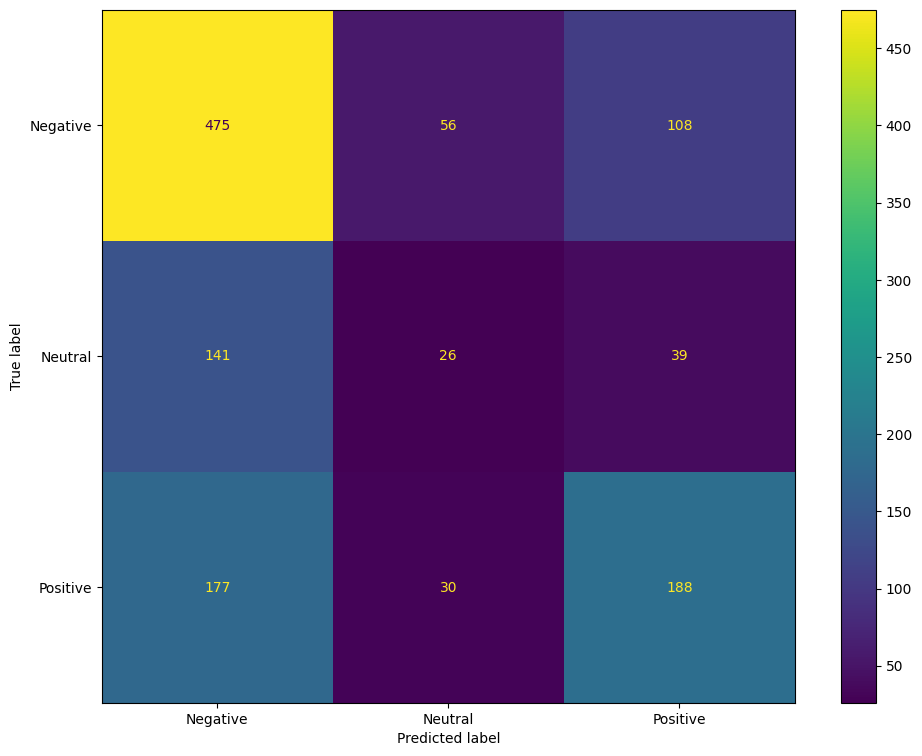

In [78]:
predictions = nb.predict(X_test)
fig, ax = plt.subplots(figsize=(12, 9))
cm = confusion_matrix(y_test, predictions, labels=nb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=nb.classes_)

disp.plot(ax=ax)
plt.show()

In [79]:
# from sklearn.metrics import plot_confusion_matrix
# plot_confusion_matrix(nb,X_test,y_test)

# **Support Vector Machine**

In [80]:
svc=SVC()
svc.fit(X_train,y_train)
trainpredict = svc.predict(X_train)
testpredict = svc.predict(X_test)

evaluation_parametrics(y_train,trainpredict,y_test,testpredict)
accuracy.append(np.round(accuracy_score(y_test,testpredict),2))

f1.append(np.round(f1_score(y_test,testpredict,average='weighted'),2))
recall.append(np.round(recall_score(y_test,testpredict,average = "weighted"),2))

precision.append(np.round(precision_score(y_train,trainpredict,average = "weighted"),2))

model.append('Support Vector Machine')

--------------------------------------------------------------------------
Classification Report for Train Data
              precision    recall  f1-score   support

    Negative       0.70      0.98      0.82      2469
     Neutral       1.00      0.29      0.45       905
    Positive       0.91      0.72      0.80      1586

    accuracy                           0.77      4960
   macro avg       0.87      0.66      0.69      4960
weighted avg       0.82      0.77      0.75      4960

Classification Report for Test Data
              precision    recall  f1-score   support

    Negative       0.56      0.93      0.70       639
     Neutral       1.00      0.00      0.01       206
    Positive       0.68      0.31      0.43       395

    accuracy                           0.58      1240
   macro avg       0.75      0.41      0.38      1240
weighted avg       0.67      0.58      0.50      1240

--------------------------------------------------------------------------
Accuracy on Tra

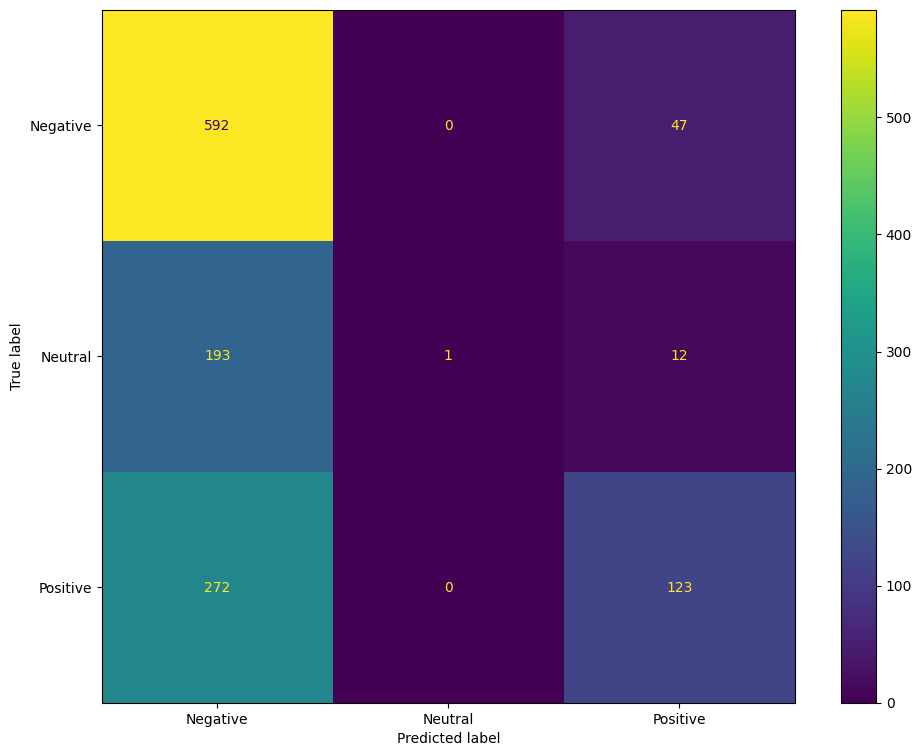

In [81]:
predictions = svc.predict(X_test)
fig, ax = plt.subplots(figsize=(12, 9))
cm = confusion_matrix(y_test, predictions, labels=svc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svc.classes_)

disp.plot(ax=ax)
plt.show()

# **K-Neighbors Classifier**

In [82]:
KNN = KNeighborsClassifier(n_neighbors = 1)
KNN.fit(X_train, y_train)

trainpredict = KNN.predict(X_train)
testpredict = KNN.predict(X_test)

evaluation_parametrics(y_train,trainpredict,y_test,testpredict)

accuracy.append(np.round(accuracy_score(y_test,testpredict),2))

f1.append(np.round(f1_score(y_test,testpredict,average='weighted'),2))
recall.append(np.round(recall_score(y_test,testpredict,average = "weighted"),2))

precision.append(np.round(precision_score(y_train,trainpredict,average = "weighted"),2))

model.append('K-Neighbors Classifier')

--------------------------------------------------------------------------
Classification Report for Train Data
              precision    recall  f1-score   support

    Negative       0.98      0.96      0.97      2469
     Neutral       0.88      0.96      0.92       905
    Positive       0.98      0.96      0.97      1586

    accuracy                           0.96      4960
   macro avg       0.95      0.96      0.96      4960
weighted avg       0.96      0.96      0.96      4960

Classification Report for Test Data
              precision    recall  f1-score   support

    Negative       0.55      0.53      0.54       639
     Neutral       0.20      0.35      0.25       206
    Positive       0.40      0.27      0.33       395

    accuracy                           0.42      1240
   macro avg       0.39      0.38      0.37      1240
weighted avg       0.45      0.42      0.43      1240

--------------------------------------------------------------------------
Accuracy on Tra

In [83]:
# from sklearn.metrics import plot_confusion_matrix
# plot_confusion_matrix(KNN,X_test,y_test)

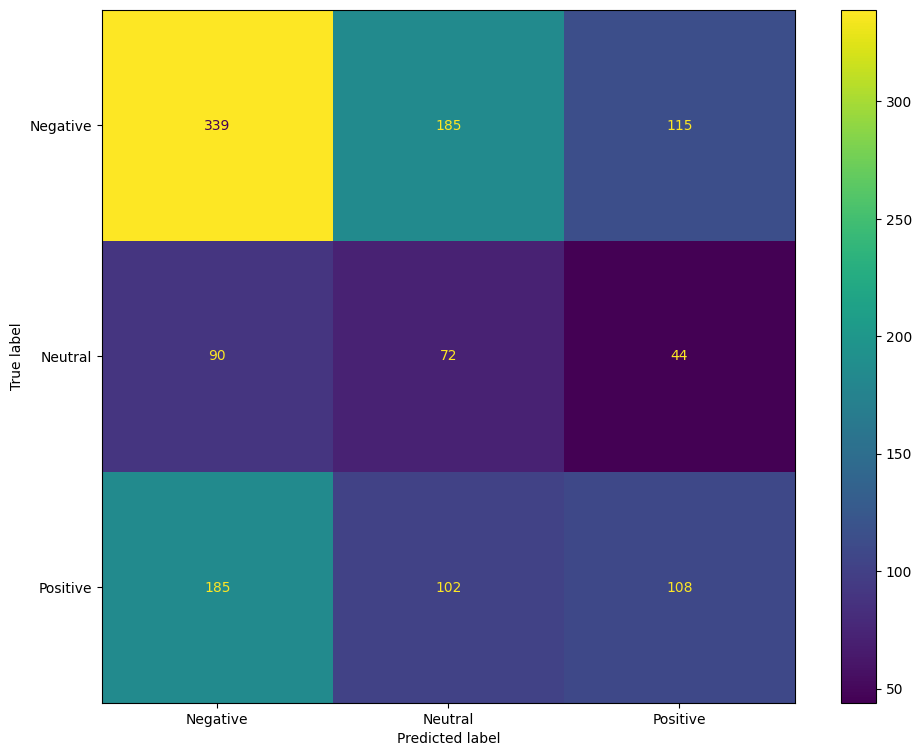

In [84]:
predictions = KNN.predict(X_test)
fig, ax = plt.subplots(figsize=(12, 9))
cm = confusion_matrix(y_test, predictions, labels=KNN.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=KNN.classes_)

disp.plot(ax=ax)
plt.show()

# **Decision Tree Classifier**

In [85]:
dst=DecisionTreeClassifier(criterion='entropy')
dst.fit(X_train,y_train)

trainpredict = dst.predict(X_train)
testpredict = dst.predict(X_test)

evaluation_parametrics(y_train,trainpredict,y_test,testpredict)

accuracy.append(np.round(accuracy_score(y_test,testpredict),2))
f1.append(np.round(f1_score(y_test,testpredict,average='weighted'),2))
recall.append(np.round(recall_score(y_test,testpredict,average = "weighted"),2))

precision.append(np.round(precision_score(y_train,trainpredict,average = "weighted"),2))
model.append('Decision Tree Classifier')

--------------------------------------------------------------------------
Classification Report for Train Data
              precision    recall  f1-score   support

    Negative       0.94      1.00      0.97      2469
     Neutral       0.98      0.90      0.94       905
    Positive       1.00      0.95      0.97      1586

    accuracy                           0.96      4960
   macro avg       0.97      0.95      0.96      4960
weighted avg       0.97      0.96      0.96      4960

Classification Report for Test Data
              precision    recall  f1-score   support

    Negative       0.57      0.65      0.61       639
     Neutral       0.22      0.23      0.22       206
    Positive       0.45      0.34      0.39       395

    accuracy                           0.48      1240
   macro avg       0.41      0.41      0.41      1240
weighted avg       0.47      0.48      0.47      1240

--------------------------------------------------------------------------
Accuracy on Tra

In [86]:
# from sklearn.metrics import plot_confusion_matrix
# plot_confusion_matrix(dst,X_test,y_test)

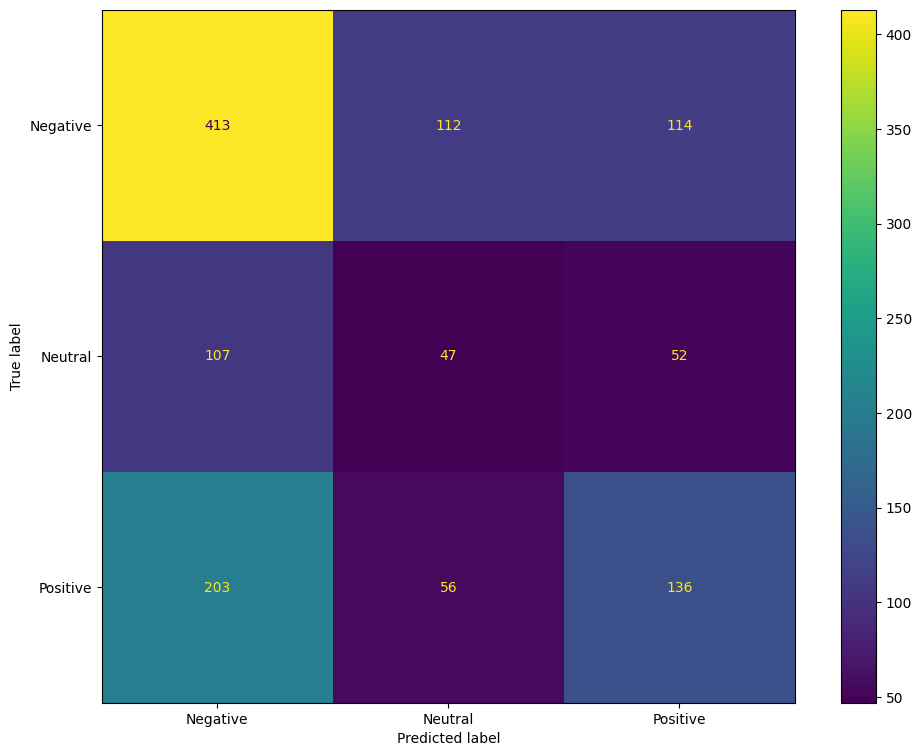

In [87]:
predictions = dst.predict(X_test)
fig, ax = plt.subplots(figsize=(12, 9))
cm = confusion_matrix(y_test, predictions, labels=dst.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dst.classes_)

disp.plot(ax=ax)
plt.show()

# **Random Forest Classifier**

In [88]:
RF_CL = RandomForestClassifier()
RF_CL.fit(X_train, y_train)

trainpredict = RF_CL.predict(X_train)
testpredict = RF_CL.predict(X_test)

evaluation_parametrics(y_train,trainpredict,y_test,testpredict)

accuracy.append(np.round(accuracy_score(y_test,testpredict),2))
f1.append(np.round(f1_score(y_test,testpredict,average='weighted'),2))
recall.append(np.round(recall_score(y_test,testpredict,average = "weighted"),2))

precision.append(np.round(precision_score(y_train,trainpredict,average = "weighted"),2))
model.append('Random Forest')

--------------------------------------------------------------------------
Classification Report for Train Data
              precision    recall  f1-score   support

    Negative       0.95      0.99      0.97      2469
     Neutral       0.97      0.90      0.93       905
    Positive       0.99      0.96      0.97      1586

    accuracy                           0.96      4960
   macro avg       0.97      0.95      0.96      4960
weighted avg       0.96      0.96      0.96      4960

Classification Report for Test Data
              precision    recall  f1-score   support

    Negative       0.56      0.72      0.63       639
     Neutral       0.25      0.15      0.18       206
    Positive       0.50      0.37      0.43       395

    accuracy                           0.52      1240
   macro avg       0.44      0.41      0.41      1240
weighted avg       0.49      0.52      0.49      1240

--------------------------------------------------------------------------
Accuracy on Tra

In [89]:
# from sklearn.metrics import plot_confusion_matrix
# plot_confusion_matrix(RF_CL,X_test,y_test)

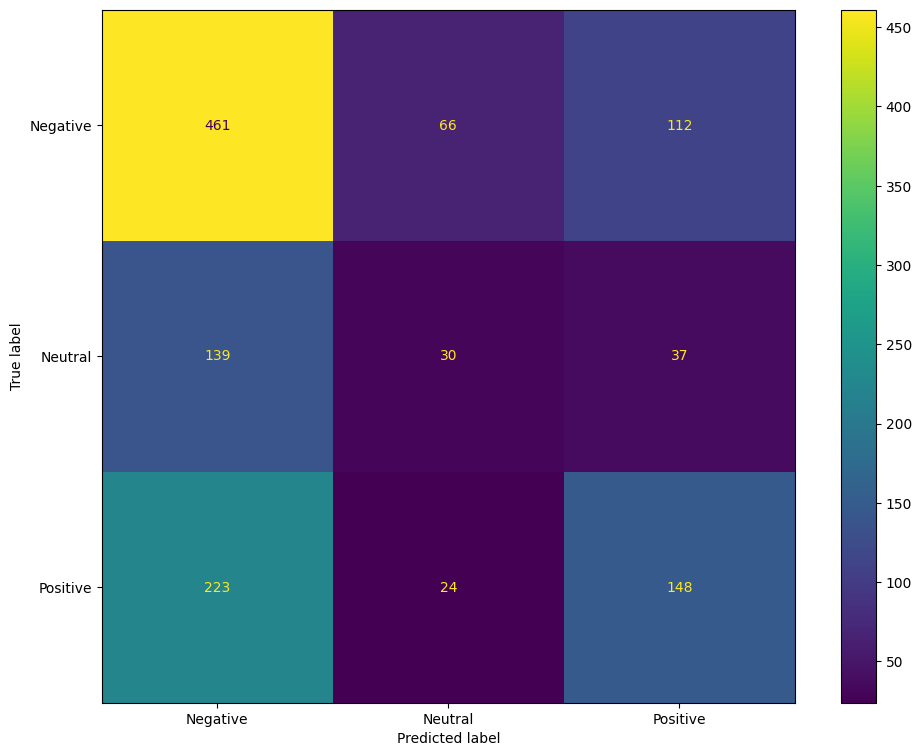

In [90]:
predictions = RF_CL.predict(X_test)
fig, ax = plt.subplots(figsize=(12, 9))
cm = confusion_matrix(y_test, predictions, labels=RF_CL.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=RF_CL.classes_)

disp.plot(ax=ax)
plt.show()

# **LogisticRegression**

In [91]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

trainpredict = lr.predict(X_train)
testpredict = lr.predict(X_test)

evaluation_parametrics(y_train,trainpredict,y_test,testpredict)

accuracy.append(np.round(accuracy_score(y_test,testpredict),2))
f1.append(np.round(f1_score(y_test,testpredict,average='weighted'),2))
recall.append(np.round(recall_score(y_test,testpredict,average = "weighted"),2))

precision.append(np.round(precision_score(y_train,trainpredict,average = "weighted"),2))
model.append('Logistic Regression')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



--------------------------------------------------------------------------
Classification Report for Train Data
              precision    recall  f1-score   support

    Negative       0.80      0.95      0.87      2469
     Neutral       0.93      0.59      0.72       905
    Positive       0.88      0.81      0.84      1586

    accuracy                           0.84      4960
   macro avg       0.87      0.78      0.81      4960
weighted avg       0.85      0.84      0.83      4960

Classification Report for Test Data
              precision    recall  f1-score   support

    Negative       0.58      0.73      0.65       639
     Neutral       0.20      0.11      0.14       206
    Positive       0.51      0.42      0.46       395

    accuracy                           0.53      1240
   macro avg       0.43      0.42      0.41      1240
weighted avg       0.49      0.53      0.50      1240

--------------------------------------------------------------------------
Accuracy on Tra

In [92]:
# from sklearn.metrics import plot_confusion_matrix
# plot_confusion_matrix(lr,X_test,y_test)

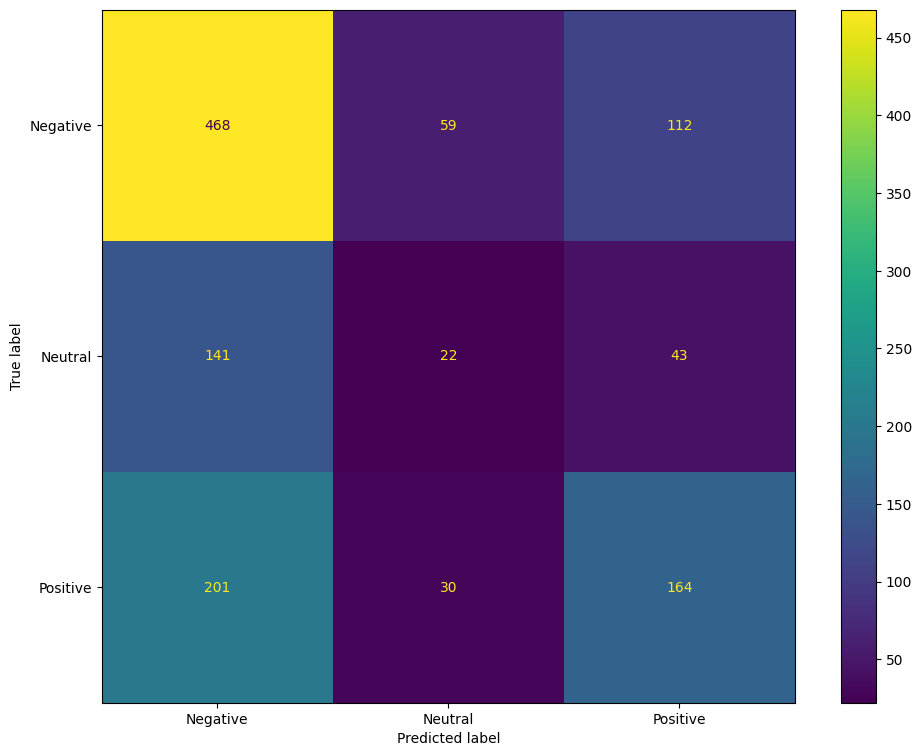

In [93]:
predictions = lr.predict(X_test)
fig, ax = plt.subplots(figsize=(12, 9))
cm = confusion_matrix(y_test, predictions, labels=lr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr.classes_)

disp.plot(ax=ax)
plt.show()

In [94]:
sgd_model = SGDClassifier(loss = 'log',penalty='l2', max_iter=5)

In [95]:
# from sklearn.linear_model import SGDClassifier

# # Create an instance of the SGDClassifier with the 'log' loss function
# sgd_model = SGDClassifier(loss='log', max_iter=1000, random_state=42)

# # Fit the model on the training data
# sgd_model.fit(X_train, y_train)

# # Continue with the rest of your code for predictions and evaluation
# trainpredict = sgd_model.predict(X_train)
# testpredict = sgd_model.predict(X_test)

# evaluation_parametrics(y_train, trainpredict, y_test, testpredict)

# accuracy.append(np.round(accuracy_score(y_test, testpredict), 2))
# f1.append(np.round(f1_score(y_test, testpredict, average='weighted'), 2))
# recall.append(np.round(recall_score(y_test, testpredict, average='weighted'), 2))

# precision.append(np.round(precision_score(y_train, trainpredict, average='weighted'), 2))
# model.append('SGD')


In [96]:
# from sklearn.metrics import plot_confusion_matrix
# plot_confusion_matrix(sgd_model,X_test,y_test)

In [97]:
# predictions = sgd_model.predict(X_test)
# fig, ax = plt.subplots(figsize=(12, 9))
# cm = confusion_matrix(y_test, predictions, labels=sgd_model.classes_)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=sgd_model.classes_)

# disp.plot(ax=ax)
# plt.show()

In [98]:
model

['MultinomialNB Algorithm',
 'Support Vector Machine',
 'K-Neighbors Classifier',
 'Decision Tree Classifier',
 'Random Forest',
 'Logistic Regression']

In [104]:
results =pd.DataFrame({
    'Model': model,
    'Accuracy': [round(score, 2) for score in accuracy],
    'F1 Score': [round(score, 2) for score in f1],
    'Recall': [round(score, 2) for score in recall],
    'Precision': [round(score, 2) for score in precision]
}
)

In [105]:
results

,Model,Accuracy,F1 Score,Recall,Precision
0,MultinomialNB Algorithm,0.56,0.53,0.56,0.74
1,Support Vector Machine,0.58,0.50,0.58,0.82
2,K-Neighbors Classifier,0.42,0.43,0.42,0.96
3,Decision Tree Classifier,0.48,0.47,0.48,0.97
4,Random Forest,0.52,0.49,0.52,0.96
5,Logistic Regression,0.53,0.50,0.53,0.85


In [106]:
output=pd.DataFrame({'Model':model,
                    'Accuracy':accuracy,
                    'Precision':precision,
                    'Recall':recall,
                    'F1 score':f1})

In [107]:
output

,Model,Accuracy,Precision,Recall,F1 score
0,MultinomialNB Algorithm,0.55565,0.73764,0.55565,0.53311
1,Support Vector Machine,0.58000,0.82000,0.58000,0.50000
2,K-Neighbors Classifier,0.42000,0.96000,0.42000,0.43000
3,Decision Tree Classifier,0.48000,0.97000,0.48000,0.47000
4,Random Forest,0.52000,0.96000,0.52000,0.49000
5,Logistic Regression,0.53000,0.85000,0.53000,0.50000
